# Cross-Modality Association Network

## Typical Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('RF_Padded_File.csv')

In [3]:
df_2=df

In [4]:
df_2.columns

Index(['Unnamed: 0', 'Speed_MPH', 'ATP', 'BP_Hg', 'JF', 'FF',
       'Src_Temperature', 'Src_Pressure', 'Src_WindSpeed', 'Src_Weather_Info',
       'NR_HR', 'Age', 'Trait_Anxiety', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Neuroticism', 'Openness', 'Gender_Female',
       'Gender_Male', 'Weekday', 'Weekend'],
      dtype='object')

In [5]:
df_2.drop(['Unnamed: 0','Src_Temperature','Src_Pressure','Src_WindSpeed','BP_Hg'],axis=1,inplace=True)

In [6]:
df_2['Src_Weather_Info'].replace([0,1,2,3,4,5],
                        ['Clear','Clouds','Mist','Drizzle','Haze','Thunder'], inplace=True)

In [7]:
df_2['Src_Weather_Info'].replace(['Clear','Clouds','Drizzle','Haze','Mist','Thunder'],
                        [0,1,2,3,4,5], inplace=True)

In [8]:
df_2

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
0,7.333333,19.600000,1.43925,25.85,1,18.207775,27,45,8,9,9,8,6,1,0,1,0
1,5.000000,18.700000,1.43925,25.85,1,17.968320,27,45,8,9,9,8,6,1,0,1,0
2,18.000000,16.900000,1.02432,33.06,1,17.265224,27,45,8,9,9,8,6,1,0,1,0
3,20.500000,16.900000,1.70738,24.79,1,15.620144,27,45,8,9,9,8,6,1,0,1,0
4,1.000000,17.300000,1.43925,25.85,1,16.943156,27,45,8,9,9,8,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243113,15.333333,16.866667,0.00000,45.61,1,28.580058,27,32,9,7,9,4,7,0,1,0,1
243114,20.000000,11.000000,0.00000,45.61,1,30.580058,27,32,9,7,9,4,7,0,1,0,1
243115,15.000000,10.350000,0.00000,45.61,1,27.580058,27,32,9,7,9,4,7,0,1,0,1
243116,4.500000,14.050000,0.00000,45.61,1,32.580058,27,32,9,7,9,4,7,0,1,0,1


In [9]:
df_psych=df_2.drop(['Speed_MPH','ATP','JF','FF','Src_Weather_Info','Weekday','Weekend'], axis=1)

## Scaling the Data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scalar=StandardScaler()

In [12]:
def scale_df(df):
    scalar=StandardScaler()
    scalar.fit(df)
    df_scale=scalar.transform(df)
    df_scaled=pd.DataFrame(data=df_scale, columns=df.columns)
    return df_scaled

In [13]:
df_scaled=scale_df(df_2)

In [14]:
df_scaled

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
0,-0.997792,-0.191469,0.180731,-1.543868,0.46185,-0.641146,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
1,-1.089952,-0.277958,0.180731,-1.543868,0.46185,-0.666167,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
2,-0.576487,-0.450936,-0.168234,-1.026411,0.46185,-0.739637,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
3,-0.477743,-0.450936,0.406234,-1.619943,0.46185,-0.911539,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
4,-1.247942,-0.412496,0.180731,-1.543868,0.46185,-0.773291,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243113,-0.681813,-0.454139,-1.029708,-0.125706,0.46185,0.442702,-0.016332,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243114,-0.497492,-1.017920,-1.029708,-0.125706,0.46185,0.651691,-0.016332,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243115,-0.694979,-1.080384,-1.029708,-0.125706,0.46185,0.338207,-0.016332,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243116,-1.109701,-0.724818,-1.029708,-0.125706,0.46185,0.860680,-0.016332,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883


In [15]:
# from scipy.stats import probplot
# for i in df_2.columns:
#     probplot(x=df_2[i],dist='norm',plot=plt)
#     plt.title(i)
#     plt.show()

In [16]:
# from sklearn.preprocessing import FunctionTransformer

In [17]:
# from sklearn.compose import ColumnTransformer

In [18]:
# df_2.columns

In [19]:
# df_2=df_2.drop('Src_Weather_Info', axis=1)

In [20]:
# log_transform = FunctionTransformer(lambda x: np.log(x))
# ct = ColumnTransformer(transformers=[['log_transform',log_transform,list(range(len(df_scaled.columns)))]],remainder='passthrough')
# log_X = ct.fit_transform(df_scaled).copy()
# log_X = pd.DataFrame(log_X,columns=df_scaled.columns).copy()

## Building the Network

In [21]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def calculate_spearman(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues
def calculate_pearson(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [22]:
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [23]:
corr = df_2.corr(method=spearmanr_pval)

In [24]:
corr

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
Speed_MPH,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.481333e-217,9.720616e-01,0.000000e+00,2.376534e-37,0.000000e+00,0.000000e+00,7.697464e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.217021e-188,3.217021e-188
ATP,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.871681e-67,0.000000e+00,0.000000e+00,2.091611e-10,0.000000e+00,0.000000e+00,0.000000e+00,1.347258e-272,0.000000e+00,5.225300e-02,5.225300e-02,4.406816e-09,4.406816e-09
JF,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.516208e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600066e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
FF,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.886409e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.531438e-74,1.531438e-74,1.280274e-08,1.280274e-08
Src_Weather_Info,5.481333e-217,5.871681e-67,5.516208e-08,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.259796e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.339264e-87,6.895222e-271,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
NR_HR,9.720616e-01,0.000000e+00,0.000000e+00,3.886409e-03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.894412e-04,3.560571e-248,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Age,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.106298e-183,0.000000e+00,0.000000e+00,0.000000e+00,4.877265e-177,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Trait_Anxiety,2.376534e-37,2.091611e-10,0.000000e+00,0.000000e+00,6.259796e-08,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.138239e-48,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.071976e-242,2.071976e-242
Extraversion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.106298e-183,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554126e-284,1.554126e-284,9.680065e-68,9.680065e-68
Agreeableness,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.138239e-48,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.430888e-31,2.430888e-31


In [25]:
df_2=df_scaled

In [26]:
# corr_matrix=df_2.corr().abs()
# half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
# df_2.drop(dropped_columns, axis=1, inplace=True)
# dropped_columns

In [27]:
calculate_spearman(df_2)

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
Speed_MPH,0.0,0.0,0.0,0.0,0.0,0.9721,0.0,0.0,0.0,0.0,0.077,0.0,0.0,0.0,0.0,0.0,0.0
ATP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0523,0.0523,0.0,0.0
JF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FF,0.0,0.0,0.0,0.0,0.0,0.0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Weather_Info,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NR_HR,0.9721,0.0,0.0,0.0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trait_Anxiety,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extraversion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agreeableness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_2.corr()

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
Speed_MPH,1.000000,0.460353,-0.344154,0.490850,-0.065203,-0.008437,-0.199010,0.000167,-0.169093,-0.356516,0.017941,-0.165746,0.348097,-0.178300,0.178300,-0.061276,0.061276
ATP,0.460353,1.000000,-0.136061,0.264896,-0.047955,-0.143575,-0.108261,0.053942,-0.073665,-0.162936,-0.131694,-0.021291,0.227002,0.041201,-0.041201,-0.039702,0.039702
JF,-0.344154,-0.136061,1.000000,-0.407268,0.058299,-0.092524,0.085923,0.046341,0.121945,0.234805,-0.010204,0.123315,-0.232116,0.176885,-0.176885,0.122627,-0.122627
FF,0.490850,0.264896,-0.407268,1.000000,-0.114130,0.007111,-0.185810,0.168405,-0.186454,-0.193563,0.047554,-0.072547,0.147159,-0.019134,0.019134,0.006713,-0.006713
Src_Weather_Info,-0.065203,-0.047955,0.058299,-0.114130,1.000000,-0.053110,0.026755,-0.071327,0.165060,0.129806,0.207054,0.010144,-0.022795,0.015792,-0.015792,-0.133975,0.133975
NR_HR,-0.008437,-0.143575,-0.092524,0.007111,-0.053110,1.000000,-0.159494,-0.194366,-0.089783,-0.242931,0.038956,-0.065044,0.116404,-0.331595,0.331595,0.195200,-0.195200
Age,-0.199010,-0.108261,0.085923,-0.185810,0.026755,-0.159494,1.000000,-0.528402,0.382342,0.432898,-0.148607,-0.170659,-0.098617,0.263567,-0.263567,0.044816,-0.044816
Trait_Anxiety,0.000167,0.053942,0.046341,0.168405,-0.071327,-0.194366,-0.528402,1.000000,-0.410554,0.127515,0.173022,0.583985,-0.452014,0.589328,-0.589328,-0.070055,0.070055
Extraversion,-0.169093,-0.073665,0.121945,-0.186454,0.165060,-0.089783,0.382342,-0.410554,1.000000,0.609303,0.376176,0.175905,-0.321823,0.028690,-0.028690,-0.004352,0.004352
Agreeableness,-0.356516,-0.162936,0.234805,-0.193563,0.129806,-0.242931,0.432898,0.127515,0.609303,1.000000,0.351850,0.435084,-0.781444,0.609485,-0.609485,-0.008833,0.008833


In [29]:
import networkx as nx

In [30]:
from matplotlib.pyplot import figure

In [31]:
G=nx.Graph()

In [32]:
pvals=calculate_spearman(df_2)

In [33]:
columns=pvals.columns

In [34]:
pvalues=pvals.values

In [35]:
nonzero=[]
for row in pvalues:
    for val in row:
        if val!=0:
            nonzero.append(val)

In [36]:
benjamini_hochberg=[]

In [37]:
sort=sorted(nonzero)
for i in range(len(sort)):
    benjamini_hochberg.append((i+1)*0.05) 

In [38]:
benjamini_hochberg

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75,
 0.8]

In [39]:
sort

[0.0006,
 0.0006,
 0.0021,
 0.0021,
 0.0021,
 0.0021,
 0.0039,
 0.0039,
 0.0523,
 0.0523,
 0.0523,
 0.0523,
 0.077,
 0.077,
 0.9721,
 0.9721]

In [40]:
# sm.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [41]:
columns

Index(['Speed_MPH', 'ATP', 'JF', 'FF', 'Src_Weather_Info', 'NR_HR', 'Age',
       'Trait_Anxiety', 'Extraversion', 'Agreeableness', 'Conscientiousness',
       'Neuroticism', 'Openness', 'Gender_Female', 'Gender_Male', 'Weekday',
       'Weekend'],
      dtype='object')

In [42]:
nonzeros={}
nonzeros['Indexes']=[]
nonzeros['Elements']=[]
nonzeros['Columns']=[]
for index, col in pvals.iteritems():
    counter=0
    arr=col.values
    for elem in arr:
        if elem>0:
            nonzeros['Indexes'].append(index)
            nonzeros['Elements'].append(elem)
            nonzeros['Columns'].append(columns[counter])
        counter+=1

In [43]:
df_map=pd.DataFrame()

In [44]:
df_map['Source']=nonzeros['Indexes']

In [45]:
df_map['Destination']=nonzeros['Columns']

In [46]:
df_map['Weights']=-np.log(nonzeros['Elements'])

In [47]:
df_map

,Source,Destination,Weights
0,Speed_MPH,NR_HR,0.028297
1,Speed_MPH,Conscientiousness,2.563950
2,ATP,Gender_Female,2.950759
3,ATP,Gender_Male,2.950759
4,FF,NR_HR,5.546779
5,NR_HR,Speed_MPH,0.028297
6,NR_HR,FF,5.546779
7,NR_HR,Conscientiousness,7.418581
8,Conscientiousness,Speed_MPH,2.563950
9,Conscientiousness,NR_HR,7.418581


In [48]:
G = nx.from_pandas_edgelist(df_map, source='Source', target='Destination',
                            edge_attr='Weights')

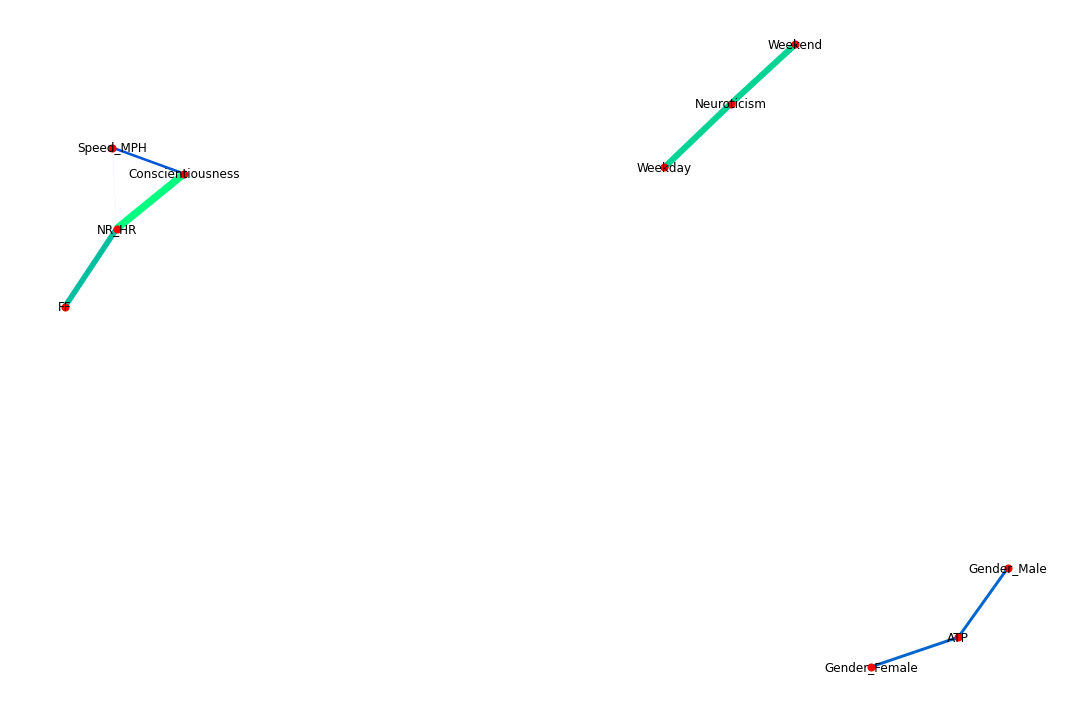

In [49]:
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors = range(172)

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='r')

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

## Community Detection

In [50]:
import networkx.algorithms.community as nx_com

In [51]:
from community import community_louvain

We can define a new centrality measure that computes the sum of the absolute values of the weights from each node. 

In [52]:
def weighted_centrality(df):
    new_centrality={}
    for index, row in df.iterrows():
        if row['Source'] not in new_centrality.keys():
            new_centrality[row['Source']]=0
        new_centrality[row['Source']]+=np.abs(row['Weights'])
        if row['Destination'] not in new_centrality.keys():
            new_centrality[row['Destination']]=0
        new_centrality[row['Destination']]+=np.abs(row['Weights'])
    return new_centrality

The following method does the following: for a graph G, it applies the louvain detection algorithm 1000 times, and counts how often each pair of features is grouped together. It then determines the best way to split the features into distinct groups (communities). 

In [53]:
def louvain_detection(G):
    nodes=list(G.nodes())
    prevalences={}
    deg_centrality = nx.degree_centrality(G)
    widths = np.array([w for *_, w in G.edges.data('Weights')])
    centrality = np.fromiter(deg_centrality.values(), float)
    label = community_louvain.best_partition(G)
    mod = community_louvain.modularity(label, G)
    values = [label.get(node) for node in G.nodes()]
    for i in range(len(values)-1):
        for j in range(i+1, len(values)):
            prevalences[(nodes[i],nodes[j])]=0 #initialize dictionary containing how often each pair grouped together
    for i in range(1000):
        deg_centrality = nx.degree_centrality(G)
        centrality = np.fromiter(deg_centrality.values(), float)
        label = community_louvain.best_partition(G)
        mod = community_louvain.modularity(label, G)
        values = [label.get(node) for node in G.nodes()]
        for j in range(len(values)-1):
            for k in range(j+1, len(values)):
                if values[j]==values[k]:
                    prevalences[(nodes[j],nodes[k])]+=1 #add one if pair grouped together 
    consen={} #initialize consensus dictionary
    for node in nodes:
        consen[node]=[]
    for key in prevalences.keys():
        consen[key[0]].append((key[1],prevalences[key]))
    pairs=[]
    for key in consen.keys():
        for elem in consen[key]:
            if elem[1]>500: #if pair grouped together more than 50% of the time, 
                            #group the elements together in consensus network
                pairs.append((key, elem[0]))
    vals={} #initialize dictionary that contains final groupings
    for i in range(len(nodes)):
        vals[nodes[i]]=i
    for i in range(len(pairs)):
        vals[pairs[i][1]]=vals[pairs[i][0]]
    values=[] #initialize array that takes final groupings
    for i in range(len(nodes)):
        values.append(0)
    for key in vals.keys():
        values[nodes.index(key)]=vals[key] #
    #Draw the graph

    plt.figure(figsize=(15,10))



    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=nodes, node_color=values, node_size=500, cmap=plt.cm.hsv)

    nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.show()
    
    

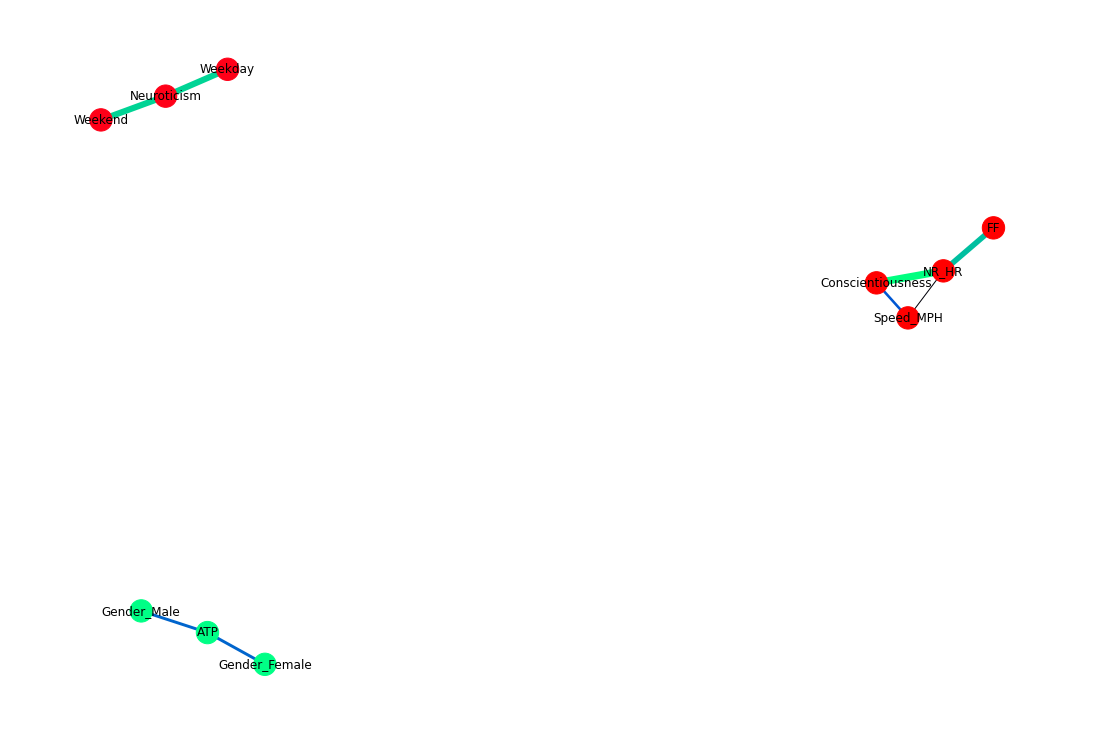

In [54]:
louvain_detection(G)

## Building the Markov Network

In [55]:
centrality=nx.eigenvector_centrality(G, weight=widths.any())

In [56]:
sorted((f"{c:0.2f}", v) for v, c in centrality.items())

[('0.00', 'ATP'),
 ('0.00', 'Gender_Female'),
 ('0.00', 'Gender_Male'),
 ('0.00', 'Neuroticism'),
 ('0.00', 'Weekday'),
 ('0.00', 'Weekend'),
 ('0.28', 'FF'),
 ('0.52', 'Conscientiousness'),
 ('0.52', 'Speed_MPH'),
 ('0.61', 'NR_HR')]

In [57]:
from sklearn.covariance import GraphicalLasso

In [58]:
def invcov(df):
    gl=GraphicalLasso()
    fit=gl.fit(df.values)
    inv_cov=pd.DataFrame(data=fit.covariance_,columns=df.columns)
    index={}
    for i in range(len(df.columns)):
        index[i]=df.columns[i]
    inv_cov.rename(index=index, inplace=True)
    return inv_cov

In [59]:
inv_cov=invcov(df_2)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:262: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00027693985579993474, tolerance: 9.360681482239692e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


In [60]:
inv_cov

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
Speed_MPH,1.000000,0.450352,-0.334157,0.480864,-0.055202,0.001562,-0.208868,0.010163,-0.179093,-0.346519,0.007942,-0.157443,0.338091,-0.168298,0.168296,-0.051288,0.051268
ATP,0.450352,1.000000,-0.145281,0.254907,-0.049217,-0.133578,-0.098265,0.046467,-0.083665,-0.172941,-0.121692,-0.011286,0.217000,0.031203,-0.031203,-0.030473,0.030474
JF,-0.334157,-0.145281,1.000000,-0.397269,0.048298,-0.082523,0.095927,0.050348,0.111950,0.224807,-0.000204,0.133311,-0.222115,0.166901,-0.166874,0.112637,-0.112622
FF,0.480864,0.254907,-0.397269,1.000000,-0.104130,-0.002891,-0.195810,0.158398,-0.196453,-0.195809,0.037554,-0.062544,0.148391,-0.025080,0.025063,-0.003292,0.003284
Src_Weather_Info,-0.055202,-0.049217,0.048298,-0.104130,1.000000,-0.043110,0.036755,-0.061328,0.162332,0.119806,0.197054,0.000144,-0.029846,0.005799,-0.005788,-0.123973,0.123976
NR_HR,0.001562,-0.133578,-0.082523,-0.002891,-0.043110,1.000000,-0.149498,-0.184366,-0.079778,-0.232932,0.028956,-0.075044,0.126389,-0.321591,0.321597,0.185193,-0.185202
Age,-0.208868,-0.098265,0.095927,-0.195810,0.036755,-0.149498,1.000000,-0.518409,0.392327,0.422900,-0.138597,-0.160678,-0.090013,0.253578,-0.253556,0.038027,-0.038033
Trait_Anxiety,0.010163,0.046467,0.050348,0.158398,-0.061328,-0.184366,-0.518409,1.000000,-0.400556,0.137522,0.163028,0.573959,-0.441973,0.579311,-0.579341,-0.060052,0.060053
Extraversion,-0.179093,-0.083665,0.111950,-0.196453,0.162332,-0.079778,0.392327,-0.400556,1.000000,0.599308,0.366172,0.165901,-0.311818,0.038697,-0.038686,-0.014330,0.014356
Agreeableness,-0.346519,-0.172941,0.224807,-0.195809,0.119806,-0.232932,0.422900,0.137522,0.599308,1.000000,0.341862,0.445073,-0.771417,0.599488,-0.599485,-0.018841,0.018829


In [61]:
def create_invcov_df(df):
    columns=df.columns
    nonzero={}
    nonzero['Indexes']=[]
    nonzero['Elements']=[]
    nonzero['Columns']=[]
    for index, col in df.iteritems():
        counter=0
        arr=col.values
        for elem in arr:
            if np.absolute(elem-1)>0.000001 and index!=columns[counter]: #eliminate correlations between same variable
                nonzero['Indexes'].append(index)
                nonzero['Elements'].append(elem*2)
                nonzero['Columns'].append(columns[counter])
            counter+=1
    df_map=pd.DataFrame()
    df_map['Source']=nonzero['Indexes']
    df_map['Destination']=nonzero['Columns']
    df_map['Weights']=nonzero['Elements']
    return df_map

In [62]:
df_map2=create_invcov_df(inv_cov)

In [63]:
df_map2

,Source,Destination,Weights
0,Speed_MPH,ATP,0.900704
1,Speed_MPH,JF,-0.668313
2,Speed_MPH,FF,0.961729
3,Speed_MPH,Src_Weather_Info,-0.110404
4,Speed_MPH,NR_HR,0.003124
...,...,...,...
267,Weekend,Neuroticism,0.003682
268,Weekend,Openness,0.019521
269,Weekend,Gender_Female,0.060079
270,Weekend,Gender_Male,-0.060079


Define the data features into different modalities, like biometric data (gender and age), psychometric data (extraversion, neuroticism, etc.), and so on.

In [64]:
modalities={'Speed_MPH':0,'ATP':0,'Src_Weather_Info':1,'Des_Weather_Info':1,'Age':5,'Trait_Anxiety':2,'Extraversion':2,'Agreeableness':2,
           'Neuroticism':2,'Gender_Female':5,'Weekday':1,'Weekend':1,'NR_HR':4,'Conscientiousness':2,'FF':1,'JF':1,'Openness':2, 'Gender_Male':5}

In [88]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 

In [89]:
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [90]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

First, the graph with all edges

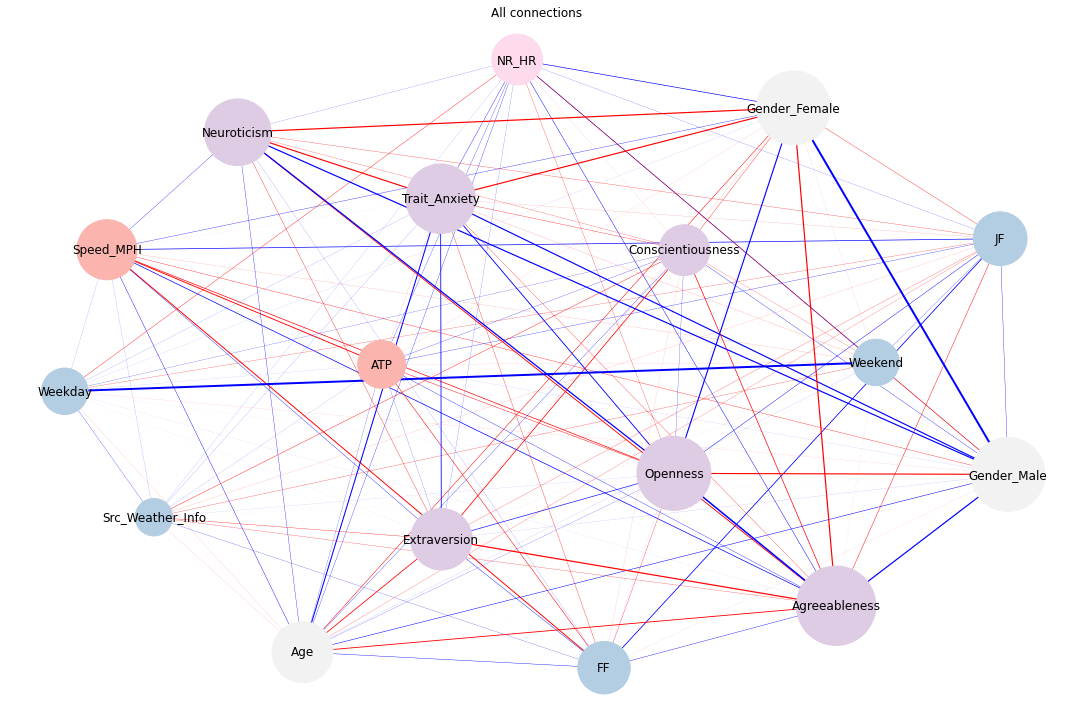

In [91]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.5)
    else:
        edge_color.append(-0.5)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_map2)[node])*300 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("All connections")
plt.tight_layout()

In [68]:
df_map2

,Source,Destination,Weights
0,Speed_MPH,ATP,0.900704
1,Speed_MPH,JF,-0.668313
2,Speed_MPH,FF,0.961729
3,Speed_MPH,Src_Weather_Info,-0.110404
4,Speed_MPH,NR_HR,0.003124
...,...,...,...
267,Weekend,Neuroticism,0.003682
268,Weekend,Openness,0.019521
269,Weekend,Gender_Female,0.060079
270,Weekend,Gender_Male,-0.060079


In [69]:
df_psych=scale_df(df_psych)

In [70]:
inv_psych=invcov(df_psych)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:262: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00023544313153222337, tolerance: 8.381017808439613e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:262: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6926006957437316e-05, tolerance: 4.024851785342872e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:316: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -2.686e-03
  warnings.warn(


In [71]:
inv_psych

,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male
NR_HR,1.000000,-0.149494,-0.184367,-0.079789,-0.232935,0.028956,-0.075048,0.126408,-0.321596,0.321597
Age,-0.149494,1.000000,-0.518394,0.392339,0.422886,-0.138600,-0.160653,-0.088618,0.253566,-0.253565
Trait_Anxiety,-0.184367,-0.518394,1.000000,-0.400579,0.137472,0.163026,0.573982,-0.442019,0.579321,-0.579329
Extraversion,-0.079789,0.392339,-0.400579,1.000000,0.599286,0.366171,0.165904,-0.311824,0.038686,-0.038693
Agreeableness,-0.232935,0.422886,0.137472,0.599286,1.000000,0.341860,0.445071,-0.771447,0.599472,-0.599486
Conscientiousness,0.028956,-0.138600,0.163026,0.366171,0.341860,1.000000,0.109382,-0.112051,0.167972,-0.167974
Neuroticism,-0.075048,-0.160653,0.573982,0.165904,0.445071,0.109382,1.000000,-0.618759,0.591322,-0.591329
Openness,0.126408,-0.088618,-0.442019,-0.311824,-0.771447,-0.112051,-0.618759,1.000000,-0.556721,0.556720
Gender_Female,-0.321596,0.253566,0.579321,0.038686,0.599472,0.167972,0.591322,-0.556721,1.000000,-0.990000
Gender_Male,0.321597,-0.253565,-0.579329,-0.038693,-0.599486,-0.167974,-0.591329,0.556720,-0.990000,1.000000


In [72]:
df_mapsych=create_invcov_df(inv_psych)

In [73]:
df_mapsych

,Source,Destination,Weights
0,NR_HR,Age,-0.298989
1,NR_HR,Trait_Anxiety,-0.368734
2,NR_HR,Extraversion,-0.159578
3,NR_HR,Agreeableness,-0.465871
4,NR_HR,Conscientiousness,0.057912
...,...,...,...
85,Gender_Male,Agreeableness,-1.198973
86,Gender_Male,Conscientiousness,-0.335947
87,Gender_Male,Neuroticism,-1.182658
88,Gender_Male,Openness,1.113439


In [74]:
G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [75]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

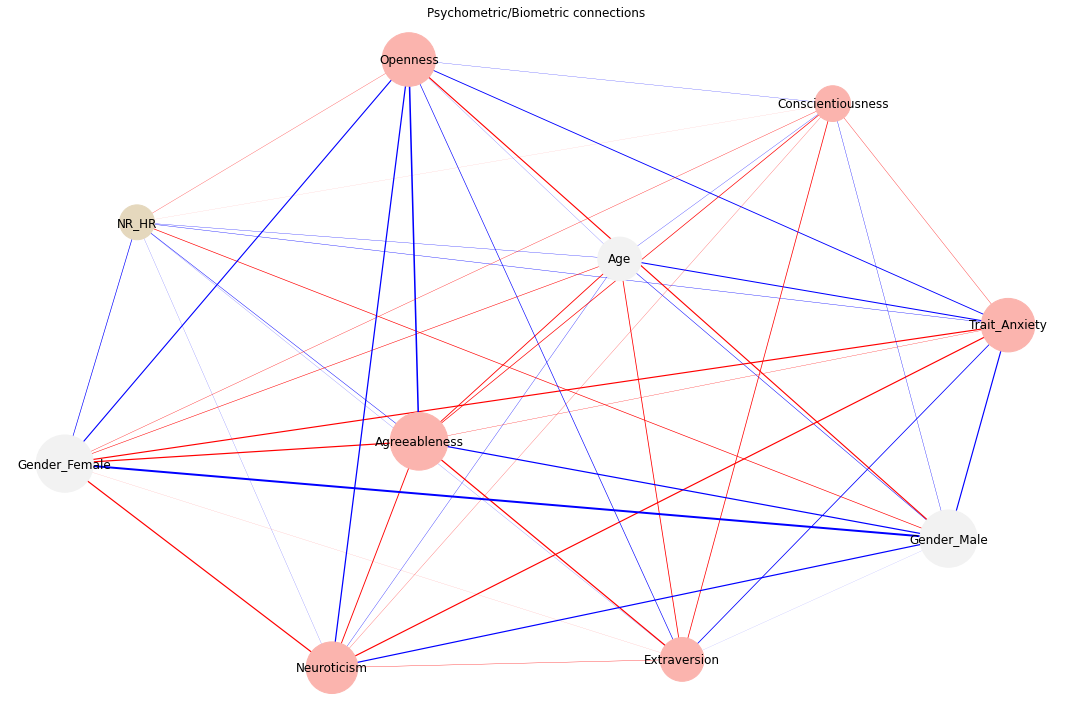

In [76]:
G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.1)
    else:
        edge_color.append(-0.1)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7)
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_mapsych)[node])*200 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Psychometric/Biometric connections")
plt.tight_layout()

In [77]:
df_2

,Speed_MPH,ATP,JF,FF,Src_Weather_Info,NR_HR,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male,Weekday,Weekend
0,-0.997792,-0.191469,0.180731,-1.543868,0.46185,-0.641146,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
1,-1.089952,-0.277958,0.180731,-1.543868,0.46185,-0.666167,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
2,-0.576487,-0.450936,-0.168234,-1.026411,0.46185,-0.739637,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
3,-0.477743,-0.450936,0.406234,-1.619943,0.46185,-0.911539,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
4,-1.247942,-0.412496,0.180731,-1.543868,0.46185,-0.773291,-0.016332,0.320536,1.117321,1.540218,1.596858,1.513597,-0.639456,0.798250,-0.798250,0.587240,-0.587240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243113,-0.681813,-0.454139,-1.029708,-0.125706,0.46185,0.442702,-0.016332,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243114,-0.497492,-1.017920,-1.029708,-0.125706,0.46185,0.651691,-0.016332,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243115,-0.694979,-1.080384,-1.029708,-0.125706,0.46185,0.338207,-0.016332,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883
243116,-1.109701,-0.724818,-1.029708,-0.125706,0.46185,0.860680,-0.016332,-1.386308,1.579433,0.459126,1.596858,-0.703707,-0.030410,-1.252741,1.252741,-1.702883,1.702883


In [78]:
df_nops=df_2.drop(['Openness','Conscientiousness','Agreeableness','Extraversion','Neuroticism'],axis=1)

In [79]:
df_nops=scale_df(df_nops)

In [80]:
inv_nops=invcov(df_nops)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:262: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001851082130795989, tolerance: 5.4154812792429136e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


In [81]:
df_manos=create_invcov_df(inv_nops)

In [82]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [83]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

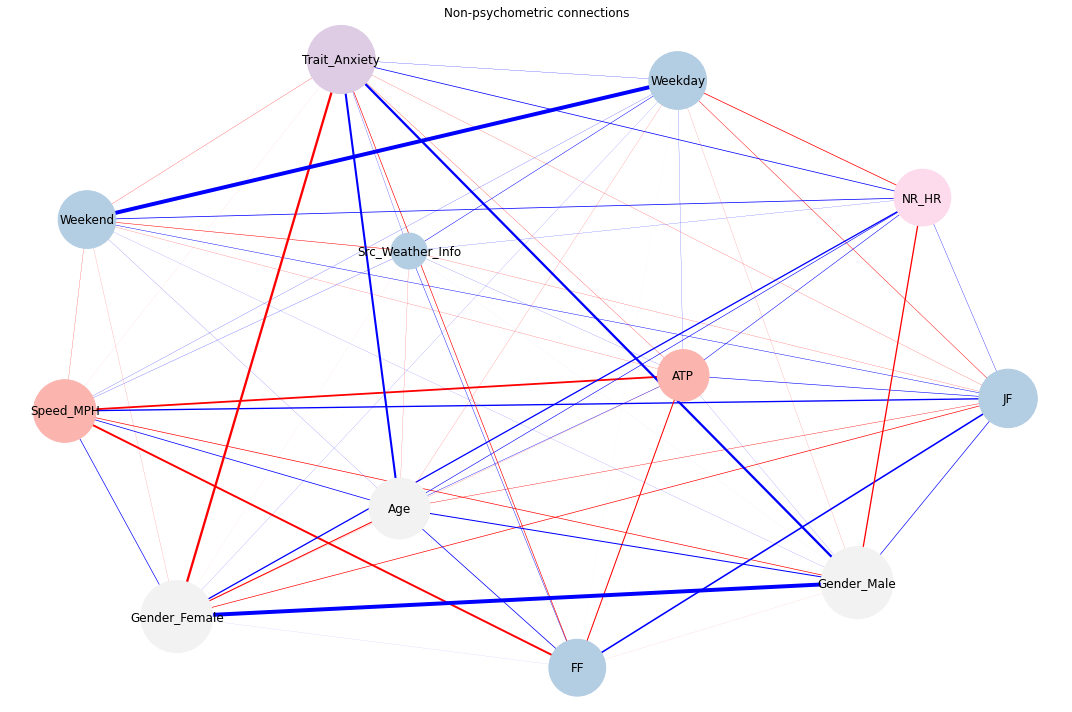

In [84]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w*2 for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.1)
    else:
        edge_color.append(-0.1)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_manos)[node])*500 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")


ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Non-psychometric connections")
plt.tight_layout()

In [85]:
df_2.corr()['ATP'].sort_values()

Agreeableness       -0.162936
NR_HR               -0.143575
JF                  -0.136061
Conscientiousness   -0.131694
Age                 -0.108261
Extraversion        -0.073665
Src_Weather_Info    -0.047955
Gender_Male         -0.041201
Weekday             -0.039702
Neuroticism         -0.021291
Weekend              0.039702
Gender_Female        0.041201
Trait_Anxiety        0.053942
Openness             0.227002
FF                   0.264896
Speed_MPH            0.460353
ATP                  1.000000
Name: ATP, dtype: float64

In [87]:
inv_nops['NR_HR'].sort_values()

Gender_Female      -0.321593
Weekend            -0.185199
Trait_Anxiety      -0.184368
Age                -0.149496
ATP                -0.133577
JF                 -0.082524
Src_Weather_Info   -0.043110
FF                 -0.000068
Speed_MPH           0.001560
Weekday             0.185200
Gender_Male         0.321595
NR_HR               1.000000
Name: NR_HR, dtype: float64